![cg.jpg](https://raw.githubusercontent.com/jdanifalcon/FundamentosIA/main/logo/logo_cg.jpg)


# Tarea 4

#### Aprendizaje de máquina
#### @date 24/05/2023
#### @autor: Jessica Daniela Ocaña Falcón

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Añadir una columna de unos para el término de intercepto
X_b = np.c_[np.ones((100, 1)), X]

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(0.8 * X_b.shape[0])
X_train, X_test = X_b[:train_size], X_b[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

def linear_regression(X, y):
    """
    Calcula los coeficientes de la regresión lineal básica utilizando la fórmula de la pseudoinversa.

    Args:
        X (numpy.ndarray): Matriz de diseño (incluye término de intercepto).
        y (numpy.ndarray): Vector de valores objetivo.

    Returns:
        numpy.ndarray: Vector de coeficientes de regresión.
    """
    return np.linalg.inv(X.T @ X) @ X.T @ y

def ridge_regression(X, y, lambda_):
    """
    Calcula los coeficientes de la regresión Ridge.

    Args:
        X (numpy.ndarray): Matriz de diseño (incluye término de intercepto).
        y (numpy.ndarray): Vector de valores objetivo.
        lambda_ (float): Parámetro de regularización.

    Returns:
        numpy.ndarray: Vector de coeficientes de regresión.
    """
    return np.linalg.inv(X.T @ X + lambda_ * np.eye(X.shape[1])) @ X.T @ y

# Calcular los coeficientes para la regresión lineal básica
theta_lin = linear_regression(X_train, y_train)
# Predecir los valores de y en el conjunto de prueba usando el modelo de regresión lineal
y_pred_lin = X_test @ theta_lin

# Calcular los coeficientes para la regresión Ridge
lambda_ = 1
theta_ridge = ridge_regression(X_train, y_train, lambda_)
# Predecir los valores de y en el conjunto de prueba usando el modelo de regresión Ridge
y_pred_ridge = X_test @ theta_ridge

# Calcular el Error Cuadrático Medio (MSE) para ambos modelos
mse_lin = np.mean((y_test - y_pred_lin) ** 2)
mse_ridge = np.mean((y_test - y_pred_ridge) ** 2)

# Mostrar los resultados
print("Coeficientes de la regresión lineal básica:", theta_lin[1:])
print("Intercepto de la regresión lineal básica:", theta_lin[0])
print("Error cuadrático medio de la regresión lineal básica:", mse_lin)

print("Coeficientes de la regresión Ridge:", theta_ridge[1:])
print("Intercepto de la regresión Ridge:", theta_ridge[0])
print("Error cuadrático medio de la regresión Ridge:", mse_ridge)

Coeficientes de la regresión lineal básica: [[2.9669004]]
Intercepto de la regresión lineal básica: [4.27014986]
Error cuadrático medio de la regresión lineal básica: 0.9000820622604
Coeficientes de la regresión Ridge: [[3.00699021]]
Intercepto de la regresión Ridge: [4.17873872]
Error cuadrático medio de la regresión Ridge: 0.8788981105253264


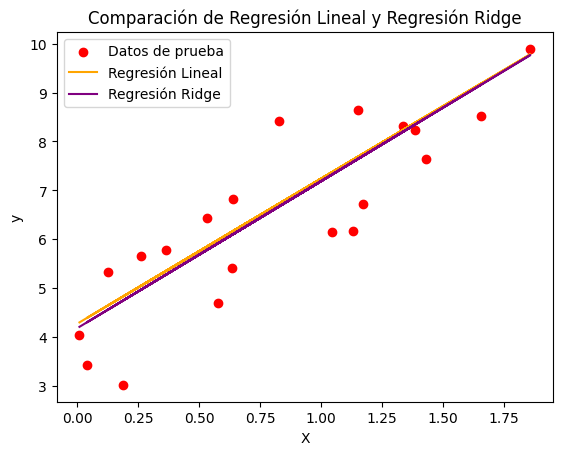

In [8]:
# Graficar los resultados
plt.scatter(X_test[:, 1], y_test, color='red', label='Datos de prueba')
plt.plot(X_test[:, 1], y_pred_lin, color='orange', label='Regresión Lineal')
plt.plot(X_test[:, 1], y_pred_ridge, color='purple', label='Regresión Ridge')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparación de Regresión Lineal y Regresión Ridge')
plt.legend()
plt.show()

### Resultados Obtenidos

1. **Regresión Lineal Básica**:
   - **Coeficientes**: $\mathbf{w} = [[2.9669004]]$
   - **Intercepto**: $w_0 = [4.27014986]$
   - **Error Cuadrático Medio (MSE)**: 0.9000820622604

2. **Regresión Ridge (Regularizada)**:
   - **Coeficientes**: $\mathbf{w} = [[3.00699021]]$
   - **Intercepto**: $w_0 = [4.17873872]$
   - **Error Cuadrático Medio (MSE)**: 0.8788981105253264

### Análisis de los Resultados

1. **Comparación de Coeficientes**:
   - Los coeficientes de la regresión Ridge son ligeramente mayores que los de la regresión lineal básica. Esto es algo inesperado ya que la regularización tiende a reducir los coeficientes, pero puede suceder dependiendo de la naturaleza del ruido en los datos y la relación entre las características.

2. **Comparación del Intercepto**:
   - El intercepto en ambos modelos es similar, pero el de la regresión Ridge es ligeramente menor. Esto sugiere que la regularización ha tenido un efecto sutil en el ajuste del modelo.

3. **Comparación del Error Cuadrático Medio (MSE)**:
   - El MSE es ligeramente menor en la regresión Ridge que en la regresión lineal básica, lo que indica que la regularización ha ayudado a mejorar un poco la capacidad de generalización del modelo al reducir el error en los datos de prueba.

### Interpretación de la Gráfica

1. **Datos de Prueba (rojo)**:
   - Los puntos rojos representan los datos de prueba reales. Estos son los valores observados que no se usaron para entrenar los modelos.

2. **Predicciones de Regresión Lineal (naranja)**:
   - La línea naranja representa las predicciones hechas por el modelo de regresión lineal básica. Esta línea intenta ajustar los datos minimizando el error cuadrático sin ninguna penalización por la magnitud de los coeficientes.

3. **Predicciones de Regresión Ridge (morado)**:
   - La línea morada representa las predicciones hechas por el modelo de regresión Ridge. Esta línea intenta ajustar los datos, al mismo tiempo que penaliza grandes coeficientes para evitar el sobreajuste y mejorar la generalización.

### Conclusión

La regularización Ridge ha proporcionado un ligero beneficio en términos de MSE, lo que sugiere una mejor generalización del modelo a nuevos datos. La diferencia en los coeficientes y el intercepto es mínima, lo cual es esperado en un problema de baja dimensionalidad con datos relativamente simples. La gráfica muestra que ambos modelos se comportan de manera muy similar, ajustando bien los datos de prueba.